In [3]:
import splitfolders
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import datasets, layers, models
import os
import random
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# split the dataset into (train, val, test)
splitfolders.ratio(input = "./Data", output = "./Output", ratio = (0.7, 0.15, 0.15))

Copying files: 1002 files [00:00, 1247.49 files/s]


In [8]:
# declare ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# create generators
train_generator = train_datagen.flow_from_directory("./Output/train",
                                                    target_size = (480,480),
                                                    color_mode = "grayscale",
                                                    batch_size = 4,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 701 images belonging to 2 classes.


In [10]:
# create generators
val_generator = train_datagen.flow_from_directory("./Output/val",
                                                    target_size = (480,480),
                                                    color_mode = "grayscale",
                                                    batch_size = 4,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 149 images belonging to 2 classes.


In [22]:
# create generators
test_generator = test_datagen.flow_from_directory("./Output/test",
                                                    target_size = (480,480),
                                                    color_mode = "grayscale",
                                                    batch_size = 4,
                                                    class_mode = "categorical",
                                                    shuffle = False)

Found 152 images belonging to 2 classes.


In [7]:
# callbacks
es = EarlyStopping(monitor = "val_loss", patience = 3)
mc = ModelCheckpoint("./best_model.h5", save_best_only = True)

In [8]:
# CNN Model - Same as Denzel's GreenRedClassifier
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(480,480,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
fit = model.fit(train_generator,
                steps_per_epoch = train_generator.samples // 4,
                validation_data = val_generator,
                validation_steps = val_generator.samples // 4,
                epochs = 50,
                callbacks = [es, mc])

Epoch 1/50
175/175 [==============================] - 15s 53ms/step - loss: 0.4159 - accuracy: 0.9555 - val_loss: 1.0864e-05 - val_accuracy: 1.0000
Epoch 2/50
175/175 [==============================] - 8s 48ms/step - loss: 4.1104e-06 - accuracy: 1.0000 - val_loss: 2.2891e-06 - val_accuracy: 1.0000
Epoch 3/50
175/175 [==============================] - 8s 48ms/step - loss: 1.5795e-06 - accuracy: 1.0000 - val_loss: 1.3153e-06 - val_accuracy: 1.0000
Epoch 4/50
175/175 [==============================] - 9s 50ms/step - loss: 1.0806e-06 - accuracy: 1.0000 - val_loss: 9.5689e-07 - val_accuracy: 1.0000
Epoch 5/50
175/175 [==============================] - 9s 49ms/step - loss: 8.6131e-07 - accuracy: 1.0000 - val_loss: 7.7728e-07 - val_accuracy: 1.0000
Epoch 6/50
175/175 [==============================] - 9s 49ms/step - loss: 7.0722e-07 - accuracy: 1.0000 - val_loss: 6.2907e-07 - val_accuracy: 1.0000
Epoch 7/50
175/175 [==============================] - 9s 50ms/step - loss: 5.9194e-07 - accuracy:

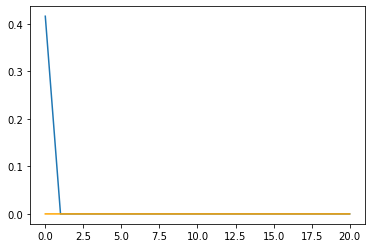

In [10]:
plt.plot(fit.epoch, fit.history["loss"])
plt.plot(fit.epoch, fit.history["val_loss"], color = "orange")

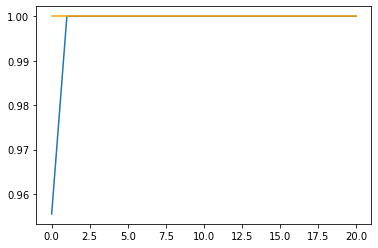

In [11]:
plt.plot(fit.epoch, fit.history["accuracy"])
plt.plot(fit.epoch, fit.history["val_accuracy"], color = "orange")

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# load trained model
model = keras.models.load_model('best_model.h5')

In [23]:
# make preds
preds = model.predict(test_generator)

38/38 [==============================] - 1s 20ms/step


In [19]:
test_generator.class_indices

{'Fake': 0, 'Real': 1}

In [13]:
preds = np.argmax(preds, axis = 1)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [14]:
confusion_matrix(test_generator.classes, preds)

array([[93,  0],
       [ 0, 59]], dtype=int64)

In [15]:
print(classification_report(test_generator.classes, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        59

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

